In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model

from planar_utils import plot_decision_boundary,sigmoid,load_planar_dataset,load_extra_datasets
from testCases import *

%matplotlib inline

np.random.seed(1)

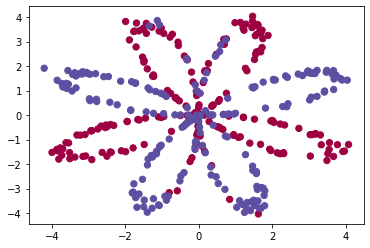

In [2]:
X,Y = load_planar_dataset()
plt.scatter(X[0,:], X[1,:], c=Y.ravel(), s=40, cmap=plt.cm.Spectral)

In [3]:
shape_X = X.shape
shape_Y = Y.shape
m = Y.shape[1]

print('X的维度是: ' + str(shape_X))
print('Y的维度是: ' + str(shape_Y))
print('训练样本的个数: ' + str(m))

X的维度是: (2, 400)
Y的维度是: (1, 400)
训练样本的个数: 400


In [4]:
clf = sklearn.linear_model.LogisticRegressionCV();
clf.fit(X.T, Y.T.ravel());

预测准确度是: 47 % 


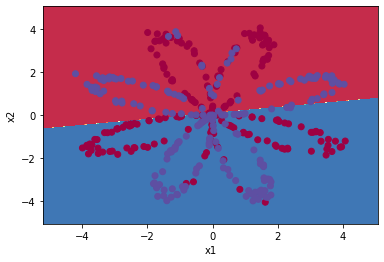

In [5]:
LR_predictions = clf.predict(X.T)

print('预测准确度是: %d ' % float((np.dot(Y, LR_predictions) + np.dot(1 - Y,1 - LR_predictions)) / float(Y.size) * 100) + '% ')
plot_decision_boundary(lambda x: clf.predict(x), X, Y.ravel())

In [6]:
def initialize_parameters(n_x, n_h, n_y):
    np.random.seed(2)
    W1 = np.random.randn(n_h,n_x) * 0.01
    b1 = np.zeros(shape = (n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros(shape = (n_y, 1))
    
    return {"W1": W1,"b1": b1,"W2": W2,"b2": b2}

In [7]:
# test unit
n_x, n_h, n_y = initialize_parameters_test_case()
parameters = initialize_parameters(n_x, n_h, n_y)
print(parameters)
print("-----------------")
print("nn dim(",n_x,",",n_h,",",n_y,")")
print("W1 dim:", parameters["W1"].shape)
print("b1 dim:", parameters["b1"].shape)
print("W2 dim:", parameters["W2"].shape)
print("b2 dim:", parameters["b2"].shape)

{'W1': array([[-0.00416758, -0.00056267],
       [-0.02136196,  0.01640271],
       [-0.01793436, -0.00841747],
       [ 0.00502881, -0.01245288]]), 'b1': array([[0.],
       [0.],
       [0.],
       [0.]]), 'W2': array([[-0.01057952, -0.00909008,  0.00551454,  0.02292208]]), 'b2': array([[0.]])}
-----------------
nn dim( 2 , 4 , 1 )
W1 dim: (4, 2)
b1 dim: (4, 1)
W2 dim: (1, 4)
b2 dim: (1, 1)


In [8]:
# 前向传播
def forward_propagation(X, parameters):    
    Z1 = np.dot(parameters['W1'], X) + parameters['b1']
    A1 = np.tanh(Z1)
    Z2 = np.dot(parameters['W2'], A1) + parameters['b2']
    A2 = sigmoid(Z2)
    
    cache = {"Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2}
    return A2, cache

In [9]:
# test unit
X_assess, parameters = forward_propagation_test_case()
A2, cache = forward_propagation(X_assess, parameters)

print(np.mean(cache['Z1']), np.mean(cache['A1']), np.mean(cache['Z2']),np.mean(cache['A2']))
print("----------------")

print("W1 dim:", parameters['W1'].shape)
print("b1 dim:", parameters['b1'].shape)
print("W2 dim:", parameters['W2'].shape)
print("b2 dim:", parameters['b2'].shape)
print("----------------")
print("Z1 dim:", cache['Z1'].shape)
print("A1 dim:", cache['A1'].shape)
print("Z2 dim:", cache['Z2'].shape)
print("A2 dim:", cache['A2'].shape)

-0.0004997557777419913 -0.0004969633532317802 0.0004381874509591466 0.500109546852431
----------------
W1 dim: (4, 2)
b1 dim: (4, 1)
W2 dim: (1, 4)
b2 dim: (1, 1)
----------------
Z1 dim: (4, 3)
A1 dim: (4, 3)
Z2 dim: (1, 3)
A2 dim: (1, 3)


In [10]:
def compute_cost(A2,Y,parameters):
    m = Y.shape[1]
    logprobs = np.multiply(np.log(A2), Y) + np.multiply((1 - Y),np.log(1 - A2))
    cost = - np.sum(logprobs) / m
    
    return cost

In [11]:
A2, Y_assess, parameters = compute_cost_test_case()

print("cost = ",compute_cost(A2, Y_assess,parameters))

cost =  0.6929198937761266


In [12]:
def backward_propagation(parameters,cache,X,Y):
    m = X.shape[1]
        
    dZ2 = cache['A2'] -Y
    dW2 = (1 / m) * np.dot(dZ2, cache['A1'].T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.multiply(np.dot(parameters['W2'].T,dZ2), 1 - np.power(cache['A1'],2))
    dW1 = (1 / m)* np.dot(dZ1, X.T)
    db1 = (1 / m)* np.sum(dZ1, axis = 1, keepdims=True)
    
    return {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}

In [13]:
parameters, cache, X_assess, Y_assess = backward_propagation_test_case()
grads = backward_propagation(parameters,cache,X_assess,Y_assess)

print("dW1 dim:",grads['dW1'].shape,"\ndb1 dim:",grads['db1'].shape,"\ndW2 dim:",grads['dW2'].shape,"\ndb2",grads['db2'].shape)

dW1 dim: (4, 2) 
db1 dim: (4, 1) 
dW2 dim: (1, 4) 
db2 (1, 1)


In [14]:
def update_parameters(parameters,grads,learning_rate=1.2):    
    W1 = parameters['W1'] - learning_rate * grads['dW1']
    b1 = parameters['b1'] - learning_rate * grads['db1']
    W2 = parameters['W2'] - learning_rate * grads['dW2']
    b2 = parameters['b2'] - learning_rate * grads['db2']
    
    return {"W1": W1, "b1": b1, "W2": W2, "b2": b2}

In [15]:
parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads)

print("W1 =", parameters['W1'], "\nb1 =", parameters['b1'], "\nW2=", parameters['W2'], "\nb2=", parameters['b2'])

W1 = [[-0.00643025  0.01936718]
 [-0.02410458  0.03978052]
 [-0.01653973 -0.02096177]
 [ 0.01046864 -0.05990141]] 
b1 = [[-1.02420756e-06]
 [ 1.27373948e-05]
 [ 8.32996807e-07]
 [-3.20136836e-06]] 
W2= [[-0.01041081 -0.04463285  0.01758031  0.04747113]] 
b2= [[0.00010457]]


In [16]:
def nn_model(X, Y, n_h, num_iterations=10000, print_cost=False):
    np.random.seed(3)
    n_x = X.shape[0]
    n_y = Y.shape[0]
    
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    for i in range(0, num_iterations):
        A2, cache = forward_propagation(X, parameters)
        cost = compute_cost(A2,Y,parameters)
        grads = backward_propagation(parameters, cache, X, Y)
        parameters = update_parameters(parameters, grads)
        if print_cost and i % 1000 == 0:
            print("在训练%i次后, 成本是: %f" % (i, cost))
            
    return parameters

In [17]:
X_assess, Y_assess = nn_model_test_case()

parameters = nn_model(X_assess, Y_assess, 4, num_iterations=10000, print_cost=False)
print("W1 =",parameters['W1'], "\nb1 =", parameters['b1'], "\nW2 =", parameters['W2'], "\nb2 =", parameters['b2'])

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/yuxiang/Documents/explore/ai/ai/02_shallow_neural_network/planar_utils.py:34: RuntimeWarning: overflow encountered in exp
  s = 1/(1+np.exp(-x))


W1 = [[-4.18491249  5.33220652]
 [-7.52991891  1.24304481]
 [-4.19257906  5.32654053]
 [ 7.52989842 -1.24305585]] 
b1 = [[ 2.32930709]
 [ 3.79453736]
 [ 2.33008777]
 [-3.79456804]] 
W2 = [[-6033.83651818 -6008.12961806 -6033.10073783  6008.06596049]] 
b2 = [[-52.66626424]]


In [18]:
def predict(parameters, X):
    A2, cache = forward_propagation(X, parameters)
    
    return np.round(A2)

In [19]:
# test unit
parameters, X_assess = predict_test_case()
predictions = predict(parameters,X_assess)
print("predictions mean = ",np.mean(predictions))

predictions mean =  0.6666666666666666


在训练0次后, 成本是: 0.693048
在训练1000次后, 成本是: 0.288083
在训练2000次后, 成本是: 0.254385
在训练3000次后, 成本是: 0.233864
在训练4000次后, 成本是: 0.226792
在训练5000次后, 成本是: 0.222644
在训练6000次后, 成本是: 0.219731
在训练7000次后, 成本是: 0.217504
在训练8000次后, 成本是: 0.219456
在训练9000次后, 成本是: 0.218558
预测准确率是: 90%


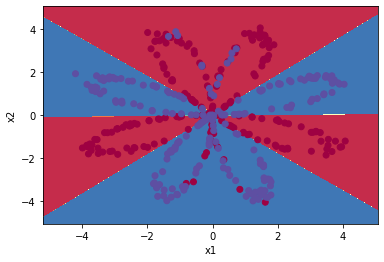

In [20]:
parameters = nn_model(X,Y,n_h = 4, num_iterations=10000,print_cost=True)
# print("parameters = ",parameters)
predictions = predict(parameters,X)
print('预测准确率是: %d' % float((np.dot(Y, predictions.T) + np.dot(1 - Y,1 - predictions.T)) / float(Y.size) * 100) + '%')

plot_decision_boundary(lambda x: predict(parameters, x.T),X,Y.ravel())

1个隐藏层神经元时的准确度是: 67.5 %
2个隐藏层神经元时的准确度是: 67.25 %
3个隐藏层神经元时的准确度是: 90.75 %
4个隐藏层神经元时的准确度是: 90.5 %
5个隐藏层神经元时的准确度是: 91.25 %
6个隐藏层神经元时的准确度是: 90.25 %


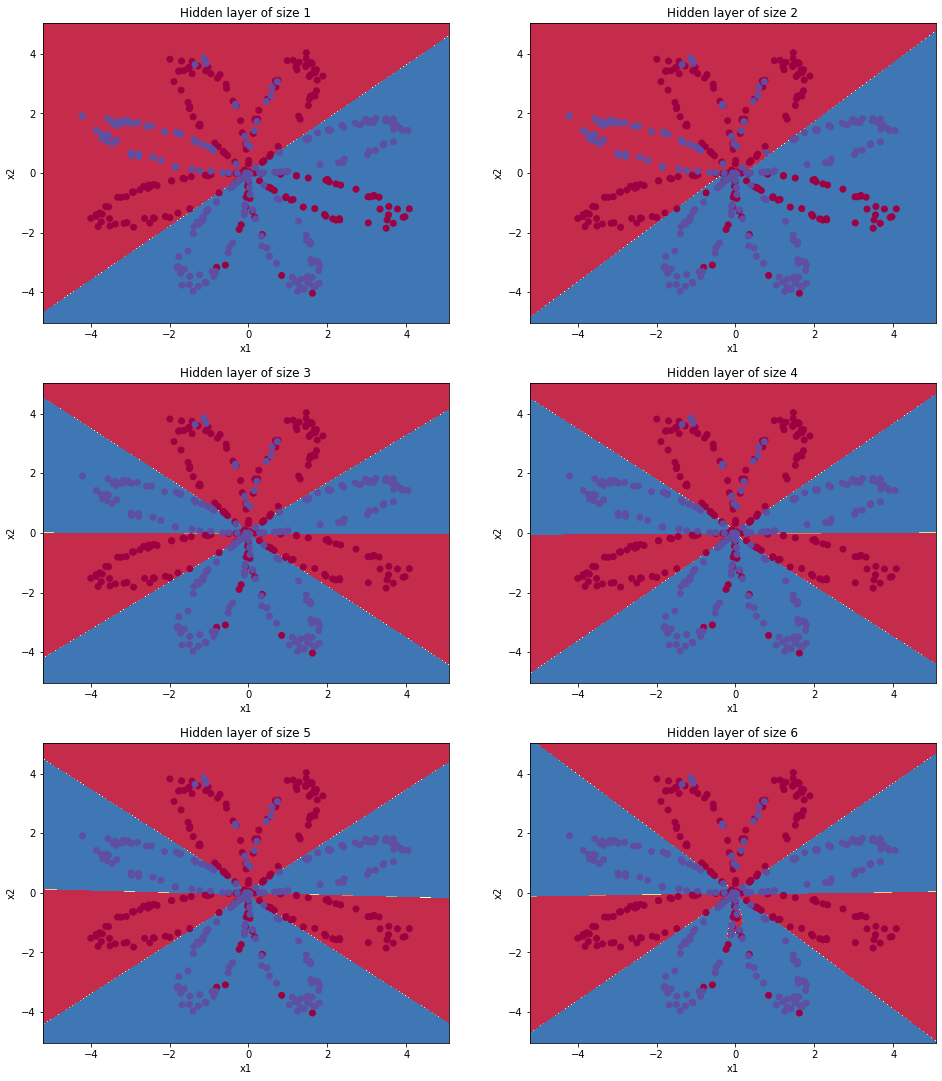

In [21]:
plt.figure(figsize=(16,32))
hidden_layer_sizes = [1,2,3,4,5,6]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i + 1)
    plt.title('Hidden layer of size %d' % n_h)
    parameters = nn_model(X, Y, n_h, num_iterations=5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y.ravel())
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T))/float(Y.size) * 100)
    print ("{}个隐藏层神经元时的准确度是: {} %".format(n_h, accuracy))